# Chapter 3-3 Other Considerations in the Regression Model

Concepts and data from "An Introduction to Statistical Learning, with applications in R"  (Springer, 2013) with permission from the authors: G. James, D. Witten,  T. Hastie and R. Tibshirani " available at [www.StatLearning.com](http://www.StatLearning.com).

For Tables reference see [http://data8.org/datascience/tables.html](http://data8.org/datascience/tables.html)

In [1]:
# HIDDEN
# For Tables reference see http://data8.org/datascience/tables.html
# This useful nonsense should just go at the top of your notebook.
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
from sklearn import linear_model
plots.style.use('fivethirtyeight')
plots.rc('lines', linewidth=1, color='r')
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
# datascience version number of last run of this notebook
version.__version__


import sys
sys.path.append("..")
from ml_table import ML_Table

import locale
locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' ) 

'en_US.UTF-8'

## 3.3 Other Considerations in the Regression Model

In [2]:
raw_credit = ML_Table.read_table("data/Credit.csv")
credit = raw_credit.drop('Unnamed: 0')
credit

Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
14.891,"3,606",283,2,34,11,Male,No,Yes,Caucasian,333
106.025,"6,645",483,3,82,15,Female,Yes,Yes,Asian,903
104.593,"7,075",514,4,71,11,Male,No,No,Asian,580
148.924,"9,504",681,3,36,11,Female,No,No,Asian,964
55.882,"4,897",357,2,68,16,Male,No,Yes,Caucasian,331
80.18,"8,047",569,4,77,10,Male,No,No,Caucasian,"1,151"
20.996,"3,388",259,2,37,12,Female,No,No,African American,203
71.408,"7,114",512,2,87,9,Male,No,No,Asian,872
15.125,"3,300",266,5,66,13,Female,No,No,Caucasian,279
71.061,"6,819",491,3,41,19,Female,Yes,Yes,African American,"1,350"


### Qualitative predictors: Gender as a factor

In [3]:
credit['Female'] = credit.apply(lambda x: 1 if x=='Female' else 0, 'Gender')
credit

Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Female
14.891,"3,606",283,2,34,11,Male,No,Yes,Caucasian,333,0
106.025,"6,645",483,3,82,15,Female,Yes,Yes,Asian,903,1
104.593,"7,075",514,4,71,11,Male,No,No,Asian,580,0
148.924,"9,504",681,3,36,11,Female,No,No,Asian,964,1
55.882,"4,897",357,2,68,16,Male,No,Yes,Caucasian,331,0
80.18,"8,047",569,4,77,10,Male,No,No,Caucasian,"1,151",0
20.996,"3,388",259,2,37,12,Female,No,No,African American,203,1
71.408,"7,114",512,2,87,9,Male,No,No,Asian,872,0
15.125,"3,300",266,5,66,13,Female,No,No,Caucasian,279,1
71.061,"6,819",491,3,41,19,Female,Yes,Yes,African American,"1,350",1


In [4]:
credit.regression_1d_params('Balance', 'Female')

(509.80310880828995, 19.73312307576812)

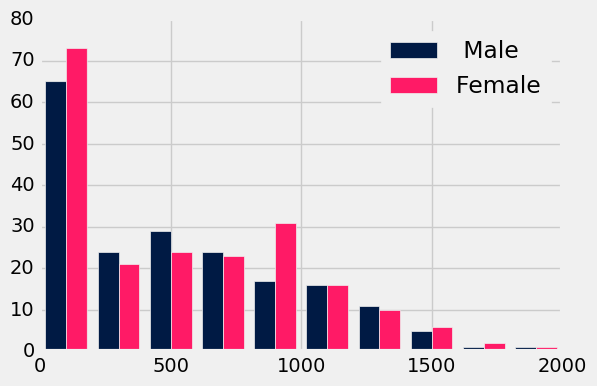

In [5]:
credit.pivot_hist('Gender', 'Balance')

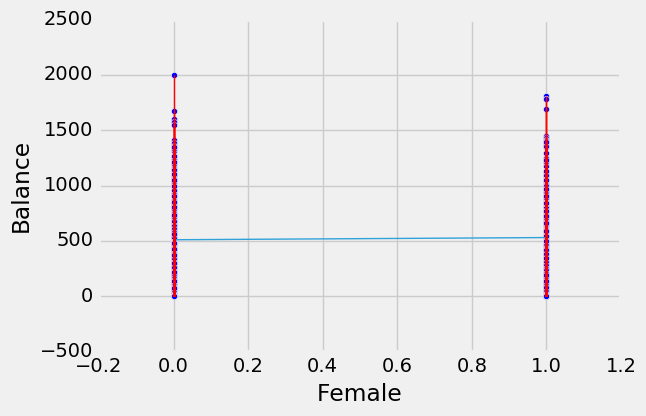

In [6]:
credit.plot_fit_1d('Balance', 'Female', credit.linear_regression('Balance', 'Female').model)

In [7]:
credit.lm_summary_1d('Balance', 'Female')

Param,Coefficient,Std Error,t-statistic,95% CI,99% CI
intercept,509.803,33.1281,15.3889,[ 443.54695523 576.05926238],[ 410.41887844 609.18733917]
Female,19.7331,46.0512,0.428504,[ -72.36929719 111.83554335],[-118.42050733 157.88675348]


### Gender differential

In [8]:
credit['GenderDif'] = credit.apply(lambda x: 1 if x=='Female' else -1, 'Gender')
credit

Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Female,GenderDif
14.891,"3,606",283,2,34,11,Male,No,Yes,Caucasian,333,0,-1
106.025,"6,645",483,3,82,15,Female,Yes,Yes,Asian,903,1,1
104.593,"7,075",514,4,71,11,Male,No,No,Asian,580,0,-1
148.924,"9,504",681,3,36,11,Female,No,No,Asian,964,1,1
55.882,"4,897",357,2,68,16,Male,No,Yes,Caucasian,331,0,-1
80.18,"8,047",569,4,77,10,Male,No,No,Caucasian,"1,151",0,-1
20.996,"3,388",259,2,37,12,Female,No,No,African American,203,1,1
71.408,"7,114",512,2,87,9,Male,No,No,Asian,872,0,-1
15.125,"3,300",266,5,66,13,Female,No,No,Caucasian,279,1,1
71.061,"6,819",491,3,41,19,Female,Yes,Yes,African American,"1,350",1,1


In [9]:
credit.lm_summary_1d('Balance', 'GenderDif')

Param,Coefficient,Std Error,t-statistic,95% CI,99% CI
intercept,519.67,23.0256,22.5692,[ 473.61846021 565.72088048],[ 450.59285514 588.74648555]
GenderDif,9.86656,23.0256,0.428504,[-36.1846486 55.91777167],[-59.21025366 78.94337674]


### Multilevel qualitative predictors

Create a factor for each characteristic pulled out of the mix, except one, which forms the *baseline*.  Here note that there is no statistical evidence of a real difference in credit balance.

Unlike the book, let's start by looking at the data.

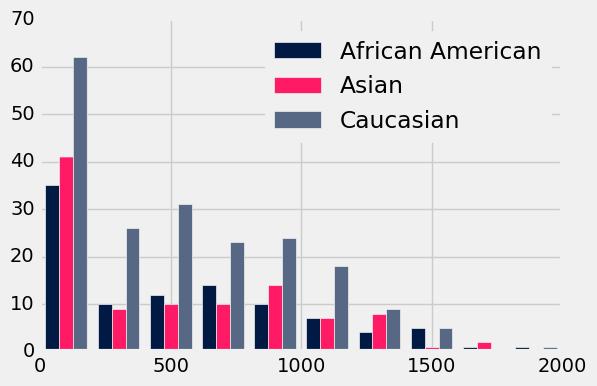

In [10]:
credit.pivot_hist('Ethnicity', 'Balance')

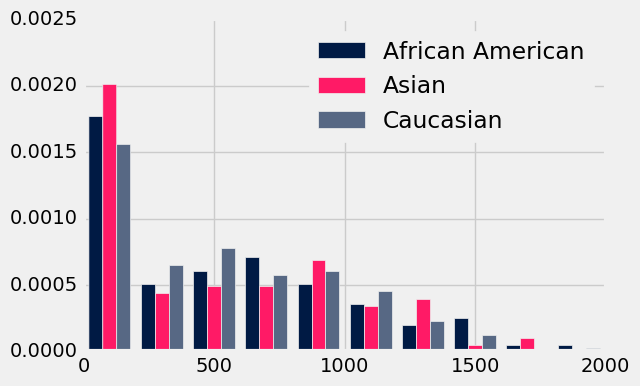

In [11]:
credit.pivot_hist('Ethnicity', 'Balance', normed=True)

In [12]:
credit['Ethnicity[Asian]'] = credit.apply(lambda x: 1 if x == 'Asian' else 0, 'Ethnicity')
credit['Ethnicity[Caucasian]'] = credit.apply(lambda x: 1 if x == 'Caucasian' else 0, 'Ethnicity')
eth_credit_balance = credit.select(['Balance', 'Ethnicity[Asian]', 'Ethnicity[Caucasian]'])
eth_credit_balance.linear_regression('Balance').summary()

Param,Coefficient,Std Error,t-statistic,95% CI,99% CI
Intercept,531,46.3187,11.4641,[ 438.36263404 623.63736596],[ 392.04395106 669.95604894]
Ethnicity[Asian],-18.6863,65.0211,-0.287388,[-148.72842439 111.35587537],[-213.74949933 176.37695031]
Ethnicity[Caucasian],-12.5025,56.681,-0.220577,[-125.86458887 100.85956374],[-182.54562702 157.5406019 ]


In [13]:
eth_model = eth_credit_balance.linear_regression('Balance').model
eth_credit_balance.lm_fit('Balance', eth_model)

Quantity,Value
Residual standard error,460.286
R^2,0.000218807
F-statistic,0.0434428


## 3.3.2 Extensions of the Linear Model

Introduce an interaction term

$Y = β_0 +β_1X_1 +β_2X_2 +β_3X_1X_2 +ε$

How does inclusion of this interaction term relax the additive assumption?
Notice that (3.31) can be rewritten as

$Y = β_0 +(β_1 +β_3X_2)X_1 +β_2X_2 +ε $

$Y = β_0 +β_{~1}X_1 +β_2X_2 +ε$


In [14]:
advertising = ML_Table.read_table("./data/Advertising.csv")
advertising = advertising.drop(0)
advertising['TVxRadio'] = advertising['TV']*advertising['Radio']
advertising

TV,Radio,Newspaper,Sales,TVxRadio
230.1,37.8,69.2,22.1,8697.78
44.5,39.3,45.1,10.4,1748.85
17.2,45.9,69.3,9.3,789.48
151.5,41.3,58.5,18.5,6256.95
180.8,10.8,58.4,12.9,1952.64
8.7,48.9,75,7.2,425.43
57.5,32.8,23.5,11.8,1886
120.2,19.6,11.6,13.2,2355.92
8.6,2.1,1,4.8,18.06
199.8,2.6,21.2,10.6,519.48


In [15]:
advertising.linear_regression('Sales').summary()

Param,Coefficient,Std Error,t-statistic,95% CI,99% CI
Intercept,6.72841,0.253319,26.561,[ 6.22177299 7.2350509 ],[ 5.96845351 7.48837038]
TV,0.0190668,0.00150928,12.633,[ 0.01604825 0.02208538],[ 0.01453897 0.02359466]
Radio,0.0279917,0.00914117,3.06215,[ 0.00970932 0.046274 ],[ 0.00056815 0.05541517]
Newspaper,0.00144424,0.00329545,0.438254,[-0.00514666 0.00803515],[-0.00844212 0.01133061]
TVxRadio,0.00108733,5.25636e-05,20.686,[ 0.00098221 0.00119246],[ 0.00092964 0.00124502]


In [16]:
advertising.lm_fit('Sales', advertising.linear_regression('Sales').model)

Quantity,Value
Residual standard error,0.938276
R^2,0.967822
F-statistic,1466.27


The R2 for the model is 96.8 %, compared to only 89.7% for the model that predicts sales using TV and radio without an interaction term. This means that (96.8 − 89.7)/(100 − 89.7) = 69% of the variability in sales that remains after fitting the additive model has been explained by the interaction term.

The *hierarchical principle* states that if we include an interaction in a model, we should also include the main effects, even if the p-values associated with their coefficients are not significant. 

In [17]:
credit['StudentFac'] = credit.apply(lambda x: 1 if x == 'Yes' else 0, 'Student')
credit

Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Female,GenderDif,Ethnicity[Asian],Ethnicity[Caucasian],StudentFac
14.891,"3,606",283,2,34,11,Male,No,Yes,Caucasian,333,0,-1,0,1,0
106.025,"6,645",483,3,82,15,Female,Yes,Yes,Asian,903,1,1,1,0,1
104.593,"7,075",514,4,71,11,Male,No,No,Asian,580,0,-1,1,0,0
148.924,"9,504",681,3,36,11,Female,No,No,Asian,964,1,1,1,0,0
55.882,"4,897",357,2,68,16,Male,No,Yes,Caucasian,331,0,-1,0,1,0
80.18,"8,047",569,4,77,10,Male,No,No,Caucasian,"1,151",0,-1,0,1,0
20.996,"3,388",259,2,37,12,Female,No,No,African American,203,1,1,0,0,0
71.408,"7,114",512,2,87,9,Male,No,No,Asian,872,0,-1,1,0,0
15.125,"3,300",266,5,66,13,Female,No,No,Caucasian,279,1,1,0,1,0
71.061,"6,819",491,3,41,19,Female,Yes,Yes,African American,"1,350",1,1,0,0,1


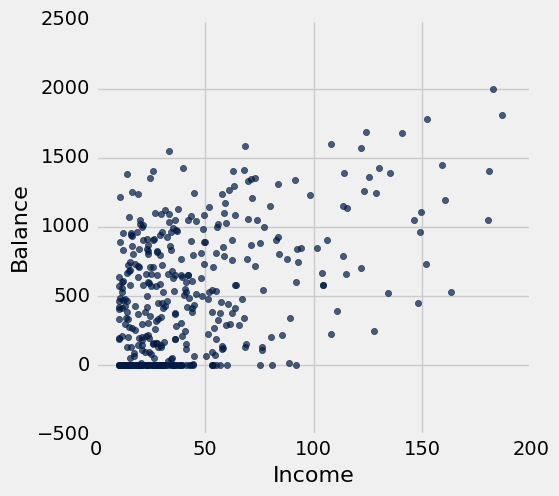

In [18]:
credit.scatter('Income', select='Balance')

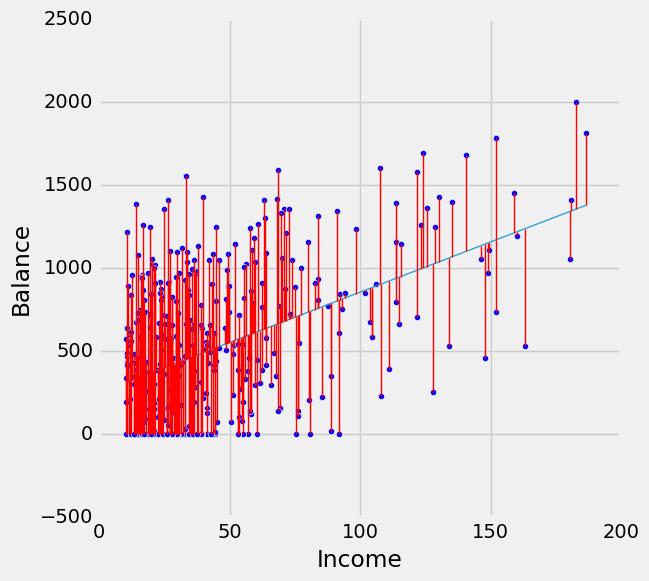

In [19]:
credit.plot_fit_1d('Balance', 'Income', credit.regression_1d('Balance', 'Income'), height=6)

In [20]:
credit.lm_summary_1d('Balance', 'Income')

Param,Coefficient,Std Error,t-statistic,95% CI,99% CI
intercept,246.515,33.1993,7.42529,[ 180.1160559 312.91344529],[ 146.91670855 346.11279264]
Income,6.04836,0.57935,10.4399,[ 4.88966308 7.20706374],[ 4.31031292 7.7864139 ]


Param,Coefficient,Std Error,t-statistic,95% CI,99% CI
intercept,677.299,118.088,5.73552,[ 441.12202149 913.47597083],[ 323.03353415 1031.56445816]
Income,4.21902,1.94524,2.16889,[ 0.32853181 8.10950392],[ -1.61671121 10.05474694]


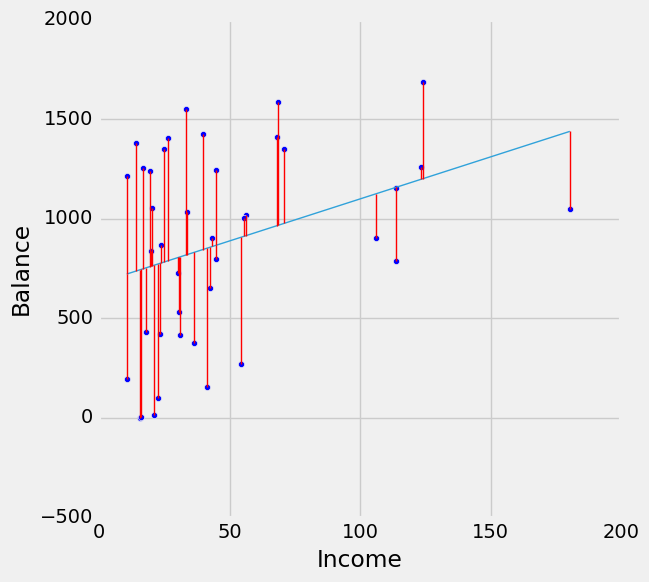

In [21]:
student_credit = credit.where('Student', 'Yes')
student_credit.plot_fit_1d('Balance', 'Income', student_credit.regression_1d('Balance', 'Income'), height=6)
student_credit.lm_summary_1d('Balance', 'Income')

Param,Coefficient,Std Error,t-statistic,95% CI,99% CI
intercept,200.623,32.9209,6.0941,[ 134.78141721 266.46488869],[ 101.86054934 299.38575656]
Income,6.21817,0.578433,10.75,[ 5.06130364 7.37503383],[ 4.48287109 7.95346638]


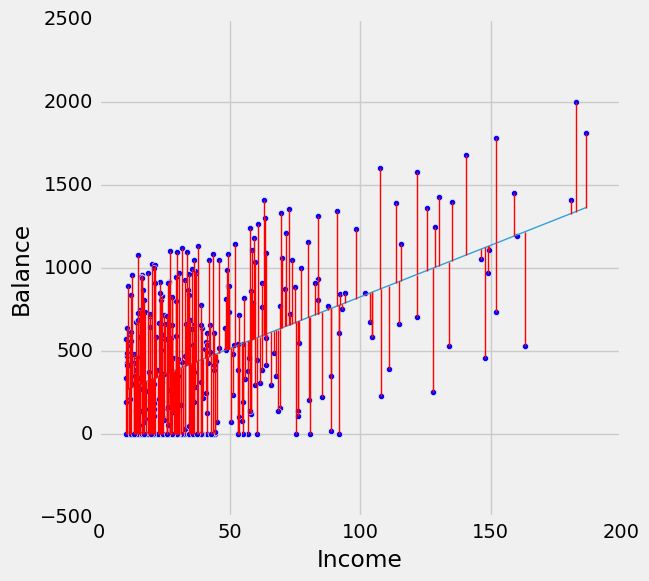

In [22]:
nostudent_credit = credit.where('Student', 'No')
nostudent_credit.plot_fit_1d('Balance', 'Income', nostudent_credit.regression_1d('Balance', 'Income'), height=6)
nostudent_credit.lm_summary_1d('Balance', 'Income')

In [23]:
credit_stu_fac = credit.select(['Balance', 'Income', 'StudentFac'])
credit_stu_fac.linear_regression('Balance').summary()

Param,Coefficient,Std Error,t-statistic,95% CI,99% CI
Intercept,211.143,32.4572,6.50527,[ 146.22854177 276.05738703],[ 113.77133045 308.51459834]
Income,5.98434,0.556623,10.7511,[ 4.87108917 7.09758196],[ 4.31446597 7.65420516]
StudentFac,382.671,65.3108,5.85922,[ 252.04892238 513.29215531],[ 186.73811415 578.60296354]


In [24]:
credit_stu_fac['StudentIncome'] = credit_stu_fac['StudentFac']*credit_stu_fac['Income']
credit_stu_fac.linear_regression('Balance').summary()

Param,Coefficient,Std Error,t-statistic,95% CI,99% CI
Intercept,200.623,33.6984,5.9535,[ 133.22641178 268.01989412],[ 99.5280412 301.7182647]
Income,6.21817,0.592094,10.502,[ 5.03398159 7.40235589],[ 4.44188801 7.99444946]
StudentFac,476.676,104.351,4.56799,[ 267.97339626 685.37829016],[ 163.62217278 789.72951363]
StudentIncome,-1.99915,1.73125,-1.15474,[-5.46165316 1.46335142],[-7.1929043 3.19460256]


"We note that the slope for students is lower than the slope for non-students. This suggests that increases in income are associated with smaller increases in credit card balance among students as compared to non-students."

But, that conclusion comes from only looking at the coefficients.  There really isn't statistical evidence of this in the data set.

## Nonlinear relationships

In [25]:
raw_auto = ML_Table.read_table("data/Auto.csv")
auto = raw_auto.where(raw_auto['horsepower'] != '?')
auto['horsepower'] = auto.apply(int, 'horsepower')

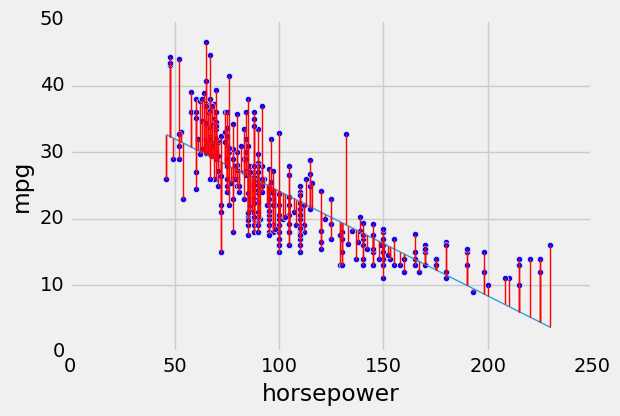

In [26]:
auto_model_1 = auto.regression_1d('mpg', 'horsepower')
auto.plot_fit_1d('mpg', 'horsepower', auto_model_1)

In [27]:
auto['HP^2'] = auto['horsepower']**2

In [28]:
auto

mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,HP^2
18,8,307,130,"3,504",12,70,1,chevrolet chevelle malibu,"16,900"
15,8,350,165,"3,693",11.5,70,1,buick skylark 320,"27,225"
18,8,318,150,"3,436",11,70,1,plymouth satellite,"22,500"
16,8,304,150,"3,433",12,70,1,amc rebel sst,"22,500"
17,8,302,140,"3,449",10.5,70,1,ford torino,"19,600"
15,8,429,198,"4,341",10,70,1,ford galaxie 500,"39,204"
14,8,454,220,"4,354",9,70,1,chevrolet impala,"48,400"
14,8,440,215,"4,312",8.5,70,1,plymouth fury iii,"46,225"
14,8,455,225,"4,425",10,70,1,pontiac catalina,"50,625"
15,8,390,190,"3,850",8.5,70,1,amc ambassador dpl,"36,100"


In [29]:
auto_mpg = auto.select(['mpg', 'horsepower', 'HP^2'])
auto_mpg.linear_regression('mpg').summary()

Param,Coefficient,Std Error,t-statistic,95% CI,99% CI
Intercept,56.9001,1.80043,31.6037,[ 53.29924609 60.50095331],[ 51.49881928 62.30138012]
horsepower,-0.46619,0.0311246,-14.9782,[-0.52843886 -0.4039404 ],[-0.55956348 -0.37281578]
HP^2,0.00123054,0.000122076,10.0801,[ 0.00098638 0.00147469],[ 0.00086431 0.00159676]


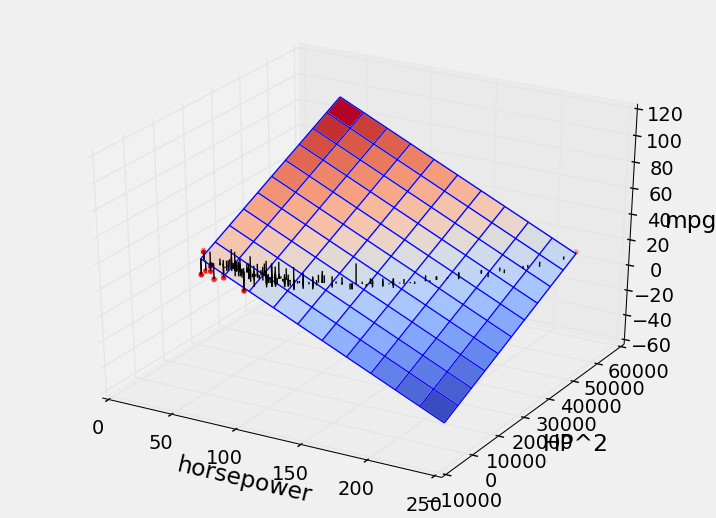

In [30]:
auto_model_2 = auto_mpg.linear_regression('mpg').model
auto_mpg.plot_fit('mpg', auto_model_2, width=8, height=6)

### Residual plots

In [31]:
auto_mpg['Fit1'] = auto_mpg.apply(auto_model_1, 'horsepower')
auto_mpg['Residual 1'] = auto_mpg['mpg'] - auto_mpg['Fit1']
auto_mpg['Fit2'] = auto_mpg.apply(auto_model_2, ['horsepower', 'HP^2'])
auto_mpg['Residual 2'] = auto_mpg['mpg'] - auto_mpg['Fit2']
auto_mpg                                  

mpg,horsepower,HP^2,Fit1,Residual 1,Fit2,Residual 2
18,130,"16,900",19.416,-1.41605,17.0915,0.908492
15,165,"27,225",13.8915,1.10852,13.4802,1.51984
18,150,"22,500",16.2592,1.74085,14.6587,3.34128
16,150,"22,500",16.2592,-0.259151,14.6587,1.34128
17,140,"19,600",17.8376,-0.837598,15.7521,1.24794
15,198,"39,204",8.6826,6.3174,12.8365,2.16351
14,220,"48,400",5.21002,8.78998,13.8963,0.103672
14,215,"46,225",5.99924,8.00076,13.5509,0.449139
14,225,"50,625",4.4208,9.5792,14.3033,-0.303323
15,190,"36,100",9.94536,5.05464,12.7464,2.25358


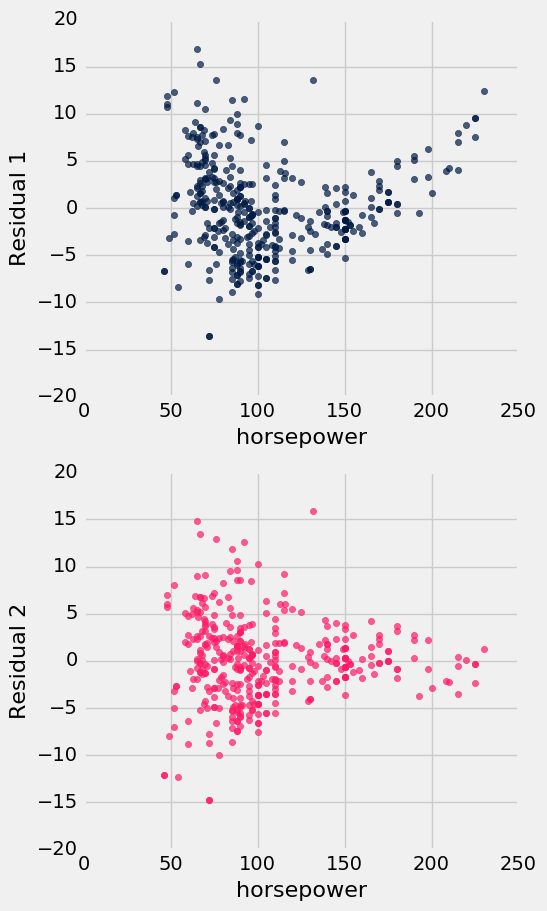

In [32]:
auto_mpg.scatter('horsepower', ['Residual 1', 'Residual 2'], overlay=False)

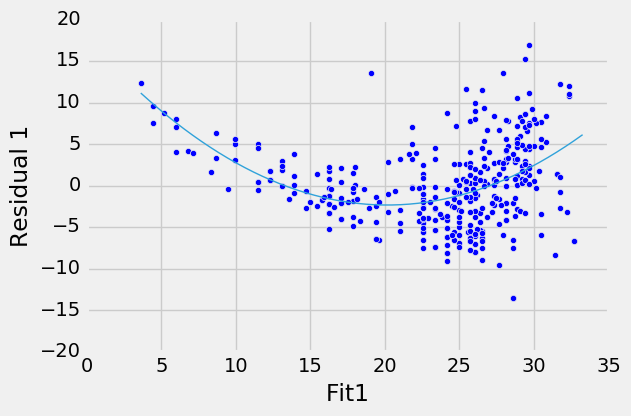

In [33]:
auto_mpg.plot_fit_1d('Residual 1', 'Fit1', auto_mpg.poly('Residual 1', 'Fit1', 2), connect=False)

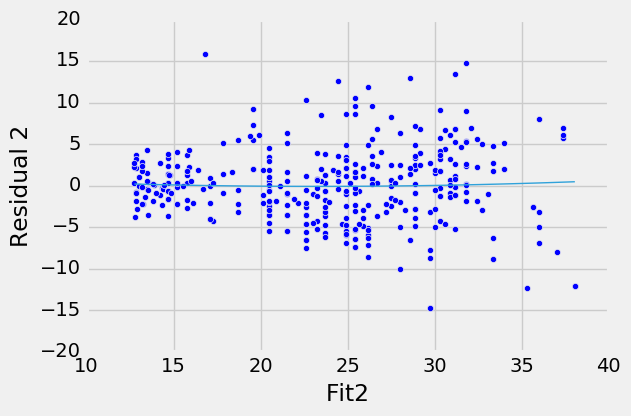

In [34]:
auto_mpg.plot_fit_1d('Residual 2', 'Fit2', auto_mpg.poly('Residual 2', 'Fit2', 2), connect=False)

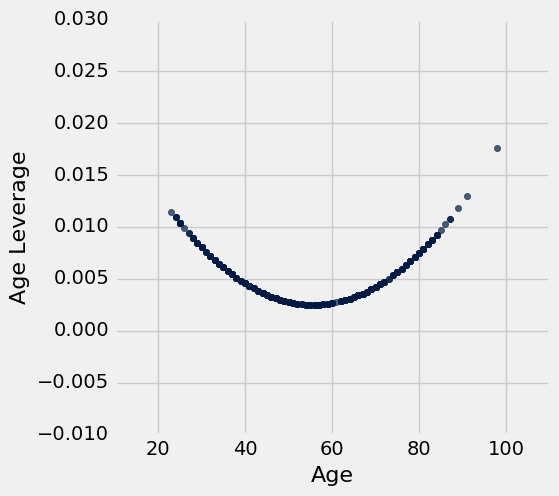

In [35]:
credit['Age Leverage'] = credit.leverage_1d('Age')
credit.scatter('Age', 'Age Leverage')

### Collinearity

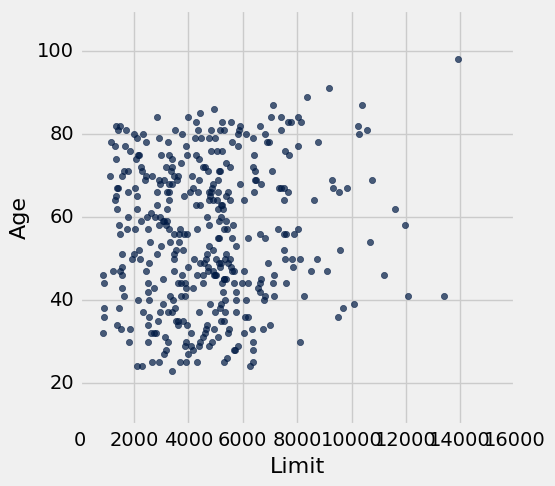

In [36]:
credit.scatter('Limit', 'Age')

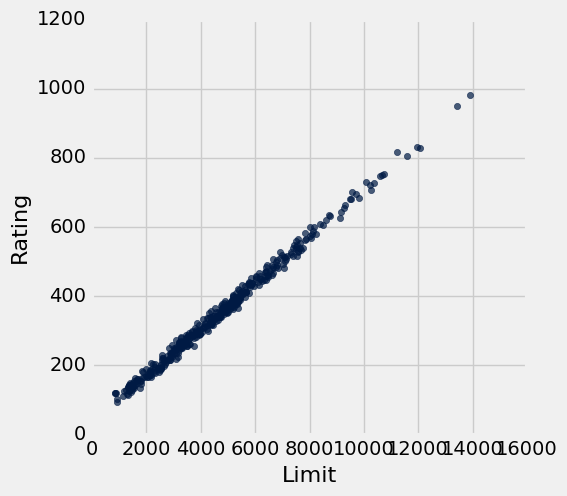

In [37]:
credit.scatter('Limit', 'Rating')

In [38]:
credit_al = credit.select(['Balance', 'Limit', 'Age'])
credit_al_model = credit_al.linear_regression('Balance').model
credit_al.linear_regression('Balance').summary()

Param,Coefficient,Std Error,t-statistic,95% CI,99% CI
Intercept,-173.411,43.8284,-3.95659,[-261.0676755 -85.75412731],[-304.89606255 -41.92574026]
Limit,0.173365,0.00502566,34.4959,[ 0.16331365 0.1834163 ],[ 0.15828799 0.18844196]
Age,-2.29149,0.672485,-3.40749,[-3.63645461 -0.94651645],[-4.30893915 -0.27403191]


In [39]:
credit_al.RSS_model('Balance', credit_al_model)

21098589.345243543

-173.410901402 0.173364974297 -2.29148553251


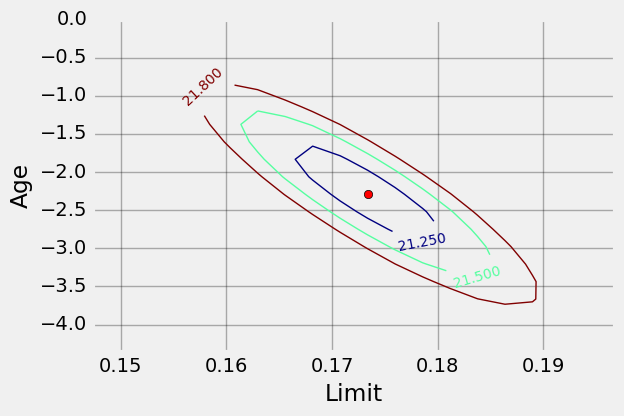

In [40]:
credit_al.RSS_contour2('Balance', x_sensitivity=0.15, y_sensitivity=1, scale=1/1000000, levels=[21.25, 21.5, 21.8])

In [41]:
credit_rl = credit.select(['Balance', 'Limit', 'Rating'])
credit_rl_model = credit_rl.linear_regression('Balance').model
credit_rl.linear_regression('Balance').summary()

Param,Coefficient,Std Error,t-statistic,95% CI,99% CI
Intercept,-377.537,45.2542,-8.34258,[-468.04514773 -287.02844298],[-513.29932392 -241.77426679]
Limit,0.0245144,0.0638346,0.38403,[-0.10315474 0.15218349],[-0.1669893 0.21601805]
Rating,2.20167,0.952294,2.31197,[ 0.29708444 4.1062599 ],[-0.65520943 5.05855377]


In [42]:
credit_rl.lm_fit('Balance', credit_rl_model)

Quantity,Value
Residual standard error,232.028
R^2,0.745943
F-statistic,582.82


In [43]:
credit_rl.RSS_model('Balance', credit_rl_model)

21427162.196908075

-377.536795356 0.024514375374 2.20167216807


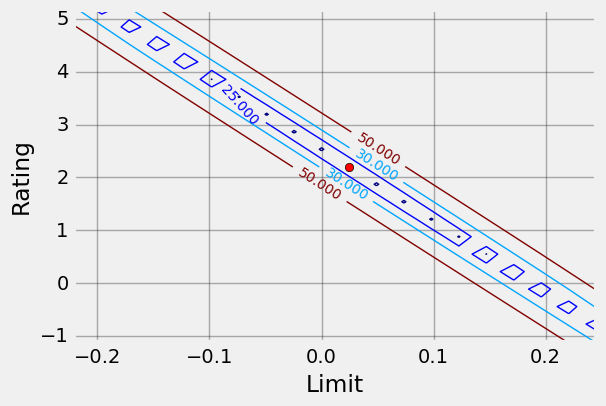

In [44]:
credit_rl.RSS_contour2('Balance', x_sensitivity=10, y_sensitivity=1.5, scale=1/1000000, levels=[22, 25, 30, 50])

In [45]:
credit.Cor()

Param,Income,Limit,Rating,Cards,Age,Education,Balance,Female,GenderDif,Ethnicity[Asian],Ethnicity[Caucasian],StudentFac,Age Leverage
Income,1,0.792088,0.791378,-0.0182726,0.175338,-0.027692,0.463656,-0.0107375,-0.0107375,-0.0171367,-0.0197006,0.0196321,0.114826
Limit,0.792088,1,0.99688,0.0102313,0.100888,-0.0235485,0.861697,0.00939668,0.00939668,-0.0324275,-0.00308075,-0.00601509,0.0859987
Rating,0.791378,0.99688,1,0.053239,0.103165,-0.0301356,0.863625,0.00888459,0.00888459,-0.0359994,-0.0010697,-0.00202765,0.0830699
Cards,-0.0182726,0.0102313,0.053239,1,0.0429483,-0.0510842,0.0864563,-0.022658,-0.022658,0.00559103,-0.00563144,-0.0261641,-0.0874431
Age,0.175338,0.100888,0.103165,0.0429483,1,0.00361928,0.00183512,0.0040155,0.0040155,-0.0596225,-0.000822062,-0.0298444,0.0118586
Education,-0.027692,-0.0235485,-0.0301356,-0.0510842,0.00361928,1,-0.00806158,-0.00504907,-0.00504907,0.0295857,-0.0377252,0.0720854,-0.0094505
Balance,0.463656,0.861697,0.863625,0.0864563,0.00183512,-0.00806158,1,0.021474,0.021474,-0.00981224,-0.00328832,0.259018,0.0199436
Female,-0.0107375,0.00939668,0.00888459,-0.022658,0.0040155,-0.00504907,0.021474,1,1,0.025425,-0.00983115,0.0550337,0.031996
GenderDif,-0.0107375,0.00939668,0.00888459,-0.022658,0.0040155,-0.00504907,0.021474,1,1,0.025425,-0.00983115,0.0550337,0.031996
Ethnicity[Asian],-0.0171367,-0.0324275,-0.0359994,0.00559103,-0.0596225,0.0295857,-0.00981224,0.025425,0.025425,1,-0.582131,0.0535339,-0.0453849
